In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf
import numpy as np
import pandas as pd


In [27]:
# getting data 

tickers = ['JPM', 'MS', 'BAC']
start_date = '2024-01-01'
end_date = '2025-03-01'
benchmark = yf.download('^GSPC', start = start_date, end = end_date)['Close']
benchmark = benchmark.pct_change() # Simple Returns for my S&P 500
benchmark = benchmark.dropna()
data = yf.download(tickers, start = start_date, end = end_date)['Close']
data

C:\Users\DELL\AppData\Local\Temp\ipykernel_11876\113734814.py:6: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
C:\Users\DELL\AppData\Local\Temp\ipykernel_11876\113734814.py:9: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  3 of 3 completed


Ticker,BAC,JPM,MS
Date,,,
2024-01-02,32.658970,166.179550,89.284668
2024-01-03,32.302513,165.455261,87.392487
2024-01-04,32.562626,166.553253,87.620689
2024-01-05,33.169563,167.388885,88.657112
2024-01-08,32.909451,167.145966,88.913841
...,...,...,...
2025-02-24,43.922352,259.740112,128.935471
2025-02-25,43.408638,255.824234,128.568420
2025-02-26,43.408638,257.205750,130.006882


<Axes: title={'center': 'Closing Price of '}, xlabel='Date'>

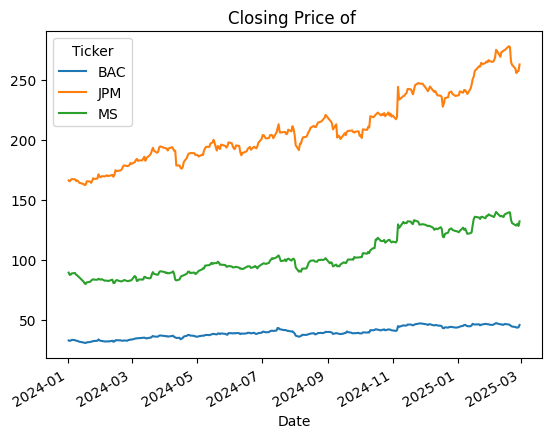

In [43]:
data.plot( title = 'Closing Price of ')


In [44]:
# Calculate Simple Return 

simple_returns = data.pct_change()
simple_returns = simple_returns.dropna() 
simple_returns

Ticker,BAC,JPM,MS
Date,,,
2024-01-03,-0.010915,-0.004358,-0.021193
2024-01-04,0.008052,0.006636,0.002611
2024-01-05,0.018639,0.005017,0.011829
2024-01-08,-0.007842,-0.001451,0.002896
2024-01-09,-0.015515,-0.007906,-0.015506
...,...,...,...
2025-02-24,-0.007811,-0.010975,-0.013061
2025-02-25,-0.011696,-0.015076,-0.002847
2025-02-26,0.000000,0.005400,0.011188


In [45]:
# Calculate Log Return 

log_returns = np.log(data/data.shift(1))
log_returns = log_returns.dropna() 
log_returns

Ticker,BAC,JPM,MS
Date,,,
2024-01-03,-0.010975,-0.004368,-0.021420
2024-01-04,0.008020,0.006614,0.002608
2024-01-05,0.018468,0.005005,0.011759
2024-01-08,-0.007873,-0.001452,0.002892
2024-01-09,-0.015637,-0.007938,-0.015628
...,...,...,...
2025-02-24,-0.007841,-0.011036,-0.013147
2025-02-25,-0.011765,-0.015191,-0.002851
2025-02-26,0.000000,0.005386,0.011126


In [46]:
# Portfolio Simple Returns 

weights = np.array([1/3, 1/3, 1/3])
portfolio_simple_returns = simple_returns.dot(weights)
portfolio_simple_returns

Date
2024-01-03   -0.012155
2024-01-04    0.005767
2024-01-05    0.011828
2024-01-08   -0.002132
2024-01-09   -0.012976
                ...   
2025-02-24   -0.010616
2025-02-25   -0.009873
2025-02-26    0.005530
2025-02-27   -0.002903
2025-02-28    0.032146
Length: 290, dtype: float64

In [47]:
# Portfolio Log Returns 

weights = np.array([1/3, 1/3, 1/3])
portfolio_log_returns = log_returns.dot(weights)
portfolio_log_returns

Date
2024-01-03   -0.012254
2024-01-04    0.005747
2024-01-05    0.011744
2024-01-08   -0.002145
2024-01-09   -0.013067
                ...   
2025-02-24   -0.010675
2025-02-25   -0.009936
2025-02-26    0.005504
2025-02-27   -0.002939
2025-02-28    0.031597
Length: 290, dtype: float64

In [60]:
# Annualize Simple Return of our Portfolio 

annualized_simple_return = ((1 + portfolio_simple_returns.mean()) ** 252) - 1
print("annual simple return is",annualized_simple_return,)

annual simple return is 0.4496157658755664


In [61]:
# Annualize Log Return of our Portfolio 

annualized_log_return = portfolio_log_returns.mean() * 252
print("annual log return is ",annualized_log_return)

annual log return is  0.34268520510106787


In [62]:
# Volatility


daily_volatility = np.std(portfolio_simple_returns)
annual_volatility = daily_volatility * np.sqrt(252)
print("annual volatility of the portfolio is ",annual_volatility)

annual volatility of the portfolio is  0.2131225189398619


In [63]:
# Calculate Beta
# Beta = Covariance(Rp, Rm)/Var(Rm) 

portfolio_returns = portfolio_simple_returns.to_numpy().flatten()
benchmark_return = benchmark.to_numpy().flatten()

cov_matrix = np.cov(portfolio_returns, benchmark_return)
beta = cov_matrix[0,1]/cov_matrix[1,1]
beta


np.float64(0.8962049661265206)

In [64]:
# Calculate Alpha => CAPM Formula to calculate Alpha

risk_free_rate = 0.07
alpha = (np.mean(portfolio_simple_returns) - risk_free_rate/252) - beta * (np.mean(benchmark) - risk_free_rate/252)
alpha = alpha * 252
alpha

np.float64(0.17976681866537764)

In [65]:
# Sharpe Ratio = (Rp - Rf)/sigma => Total Volatility


sharpe_ratio = (annualized_simple_return - risk_free_rate)/annual_volatility
sharpe_ratio

np.float64(1.7812090799409372)

In [67]:
# Sortino Ratio


negative_returns = portfolio_simple_returns[portfolio_simple_returns < 0]
downside_deviation = np.std(negative_returns)                                      # Daily Downside Std Dev
downside_deviation = downside_deviation * np.sqrt(252)                             # Annualized Downside Std Dev
downside_deviation

# Sortino Ratio = (Rp - Rf)/sigma(d) => Downside Volatility

sortino_ratio = (annualized_simple_return - risk_free_rate)/downside_deviation
sortino_ratio

np.float64(2.7641634443725973)

In [68]:
# Calmar Ratio = Rp/Max Drawdown


cumulative_simple_returns = (1 + portfolio_simple_returns).cumprod() 
max_drawdown = ((cumulative_simple_returns.cummax() - cumulative_simple_returns)/cumulative_simple_returns.cummax()).max()


# Calmar Ratio 

calmar_ratio = annualized_simple_return/max_drawdown
calmar_ratio

np.float64(3.3746190705878503)

In [69]:
# Treynor Ratio 

treynor_ratio = (annualized_simple_return - risk_free_rate)/beta
treynor_ratio

np.float64(0.4235814129844652)

In [70]:
# Value at Risk (Historical Method) 

portfolio_value = 1000000
var_90 = np.percentile(portfolio_simple_returns, 10) * portfolio_value
var_90

np.float64(-12316.38217585077)

In [71]:
# Conditional VaR / Expected Shortfall 


c_var = portfolio_simple_returns[portfolio_simple_returns <= np.percentile(portfolio_simple_returns, 5)].mean()
c_var = c_var * portfolio_value
c_var

np.float64(-27813.54847868654)